In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data from csv file
data = pd.read_csv("day.csv")

In [3]:
data.head() # first five records

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Checking the shape of the data
data.shape

(730, 16)

We have dataset of 730 rows and  16 columns.

In [5]:
#check dataframe's null values and datatypes.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#checking the details of the numerical data
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
data.columns #data columns info

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
data.isnull().sum() #checking null values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Insights
No null values in the dataset

# Cleaning the data

In [9]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Interpretation

Dropping the unwanted columns

Droping instant column as it is index column which is of no use

Dropping dteday as we have already have month and weekday columns to work with

Dropping casual and registered columns as as we have cnt column which is sum of the both that is the target column

In [10]:
# Implementation of above points

data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [11]:
# Converting the features season, month, weekday and weathersit values into categorical string values.

data.season = data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
data.month = data.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
data.weekday = data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
data.weathersit = data.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [12]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


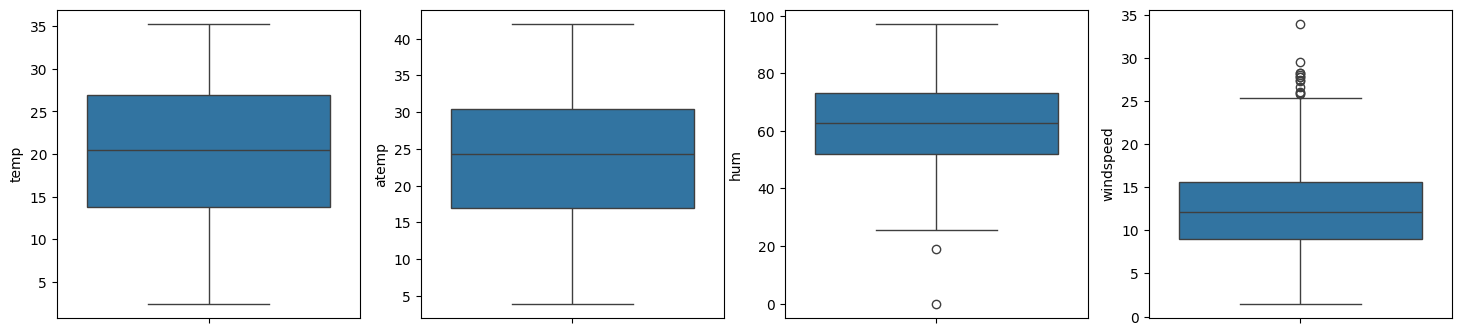

In [14]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=data)
    i+=1

Observation-

From these plots, we can conclude that there are no outliers.

# Visualizing the data

In [15]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

#### Analyzing the numeric variables

<Figure size 1500x3000 with 0 Axes>

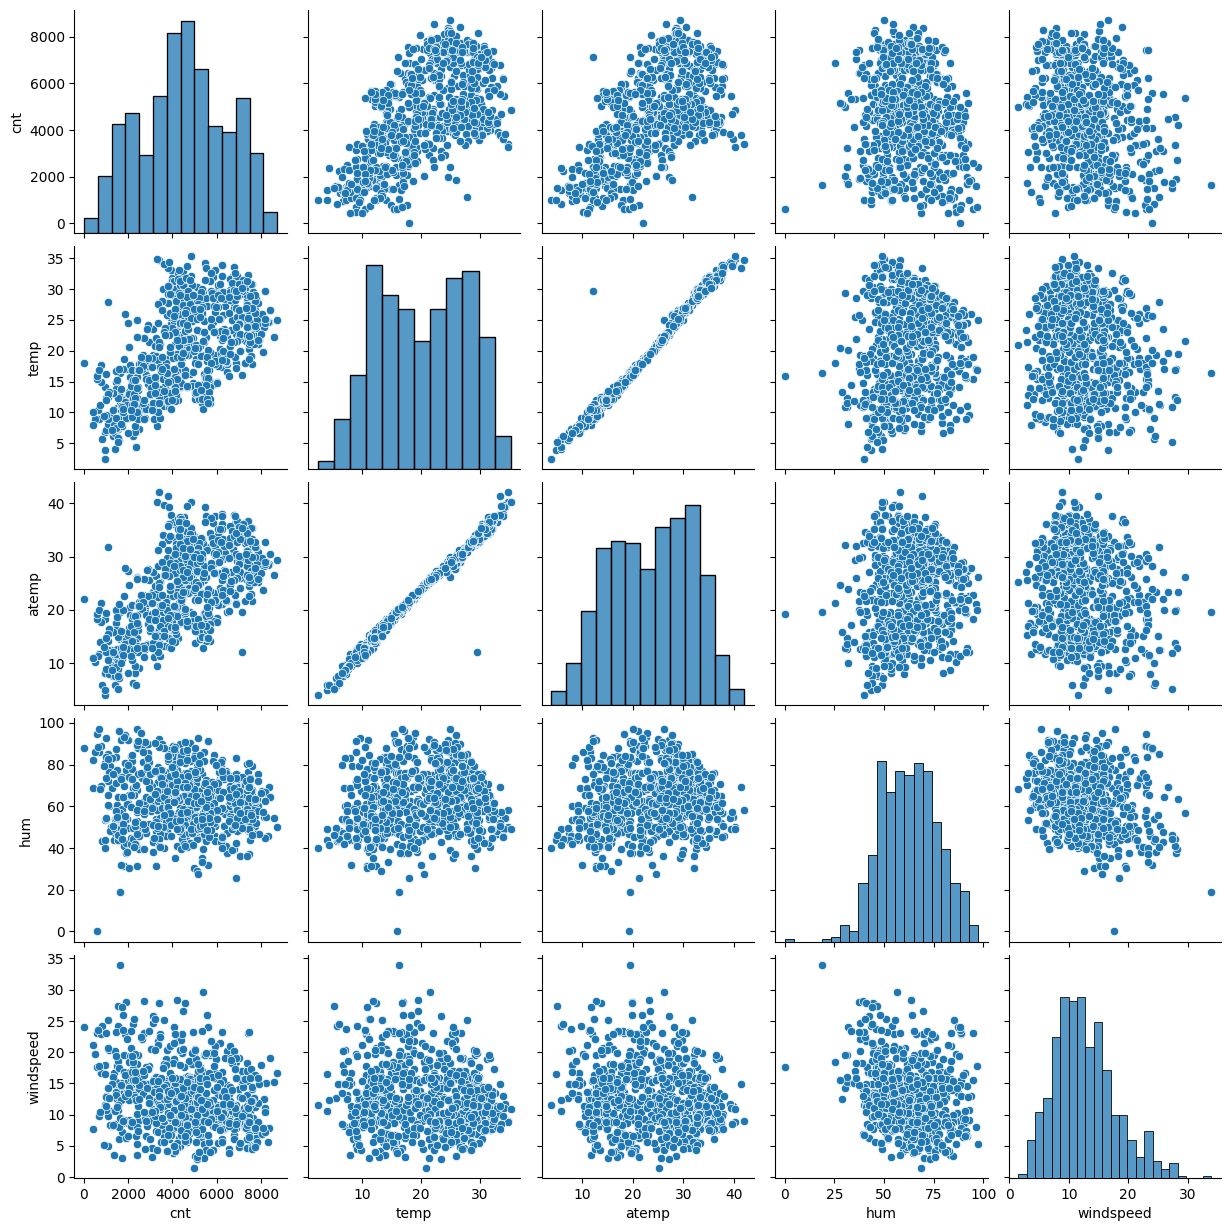

In [16]:
#pairplots for continuous numeric variables

plt.figure(figsize = (15,30))
sns.pairplot(data=data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

temp and atemp are highly correlated to each other which is obvious

We can also see that temp and atemp are more correlated to target variable than other variables.

<Figure size 2000x1500 with 0 Axes>

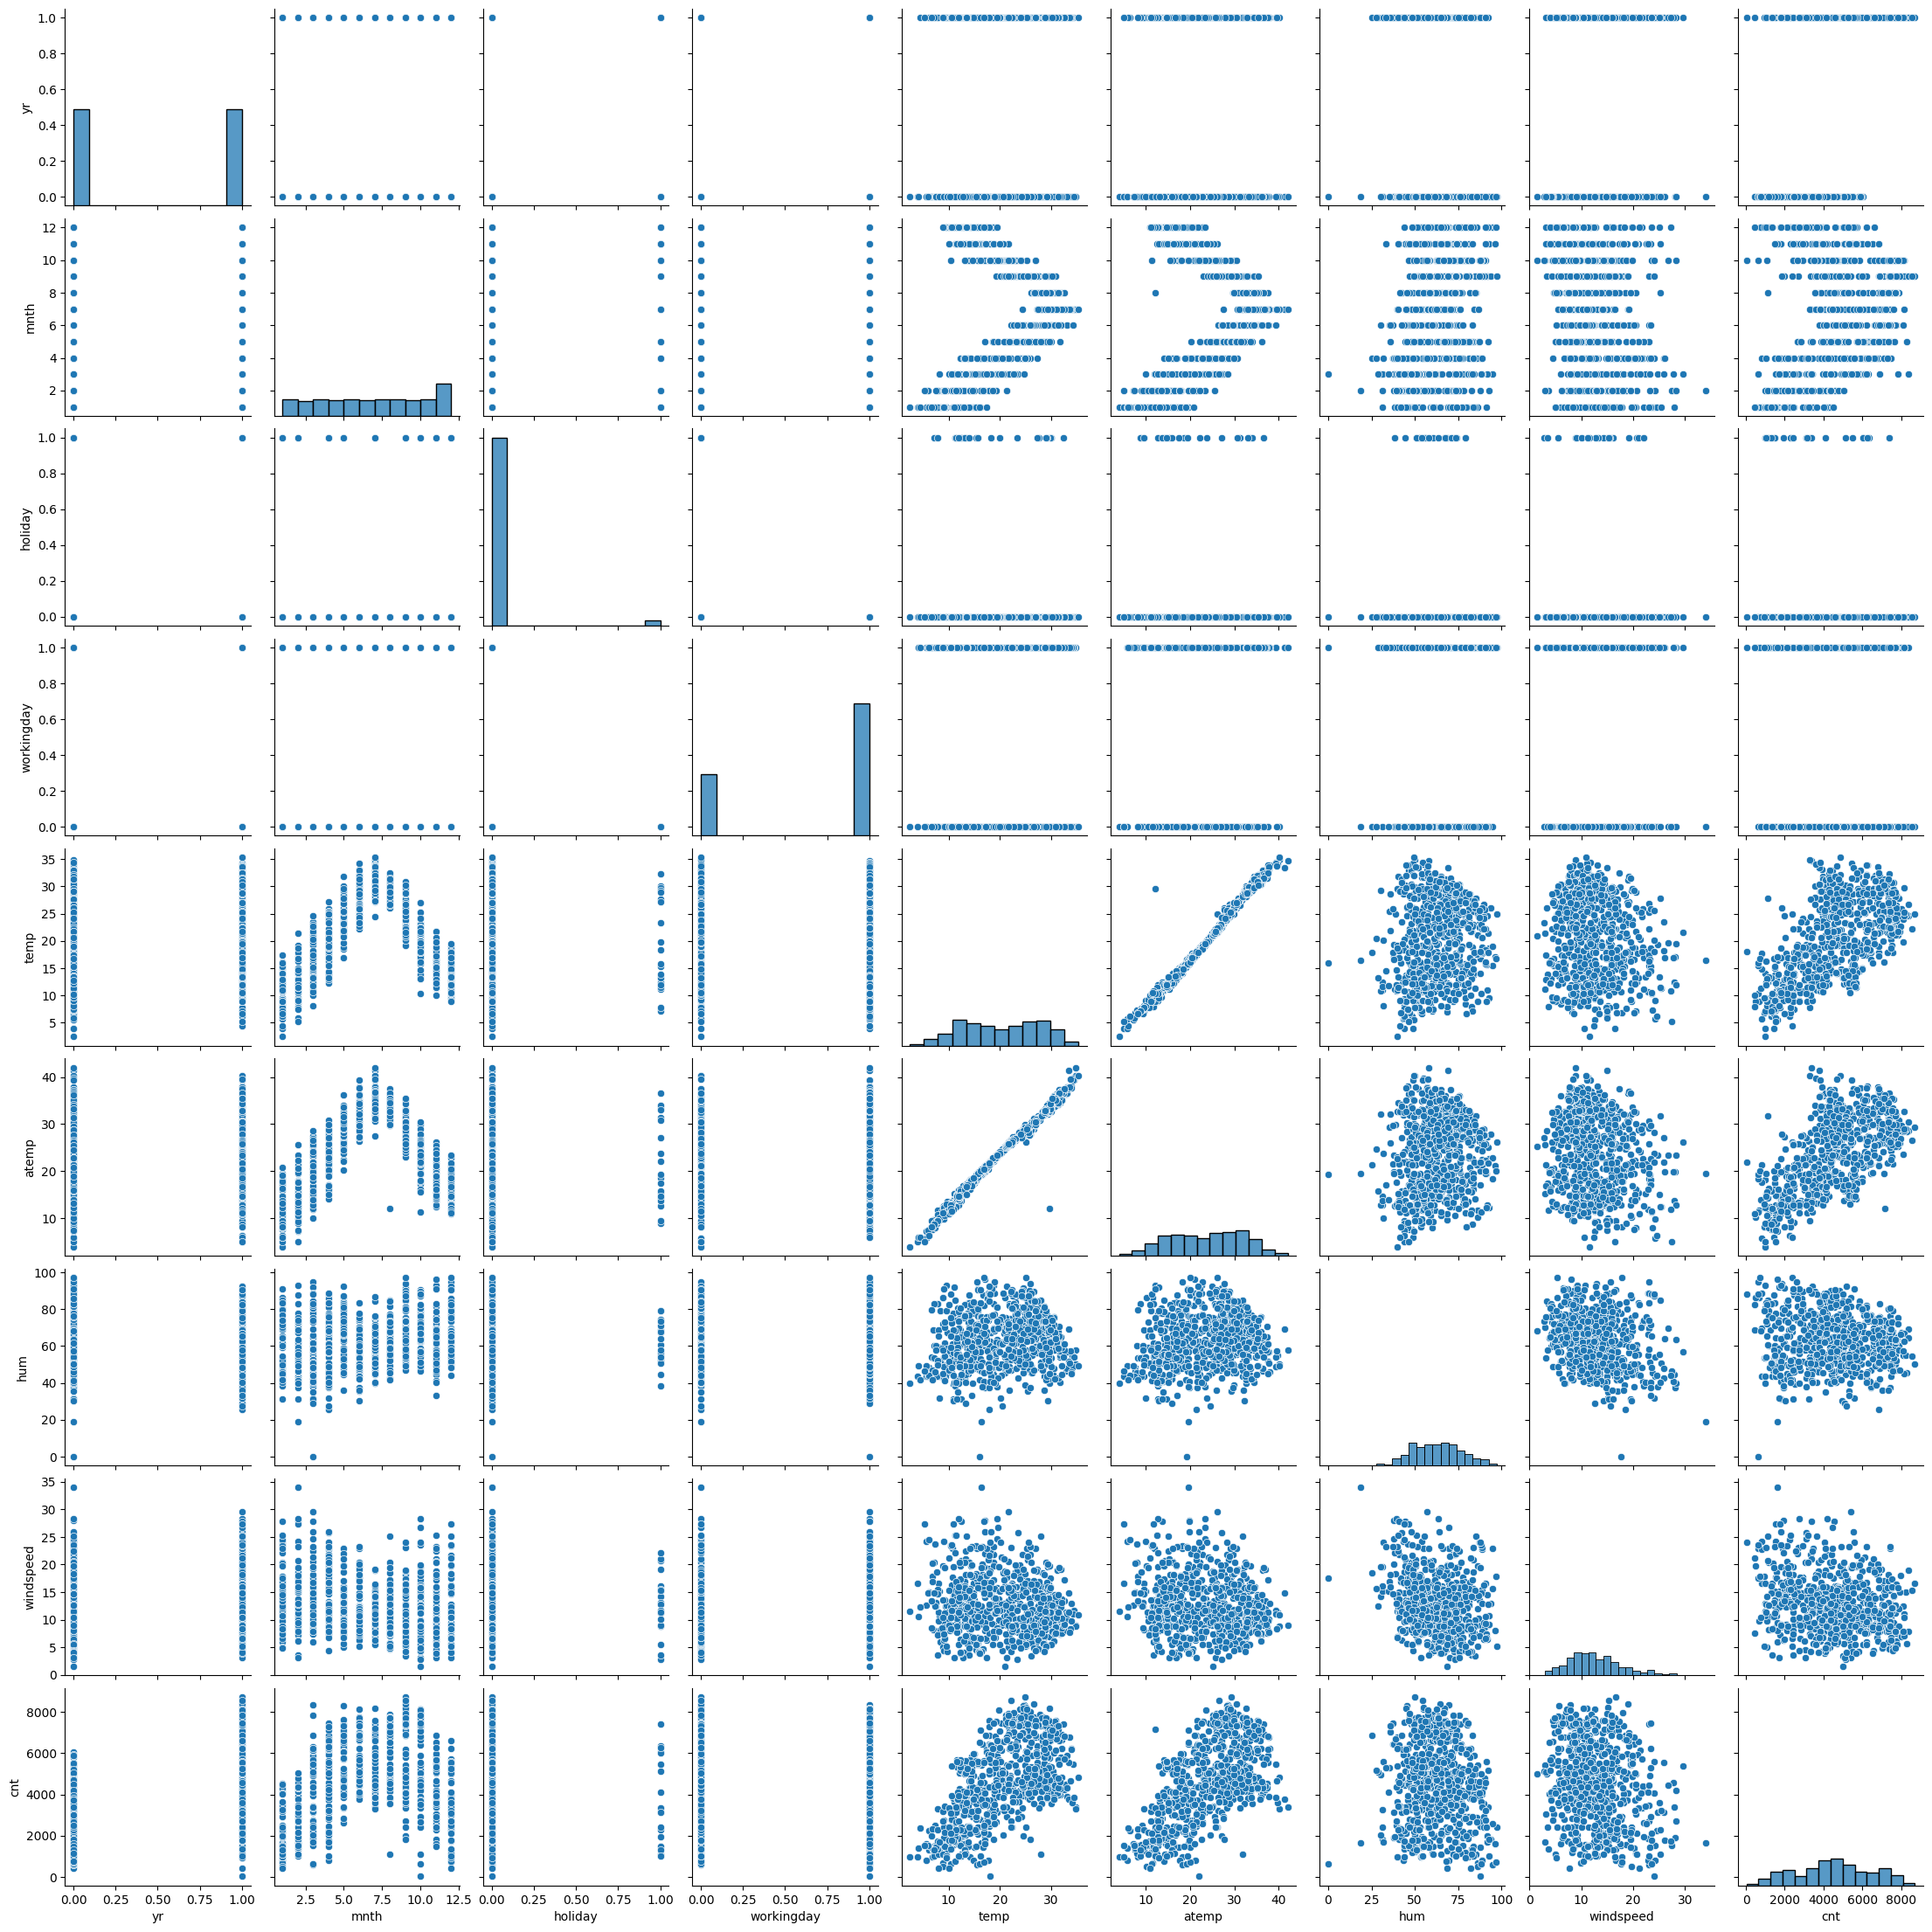

In [17]:
# Visualising the Data to Find the Correlation between all the Numerical Variables

plt.figure(figsize=(20,15))
sns.pairplot(data)
plt.show()

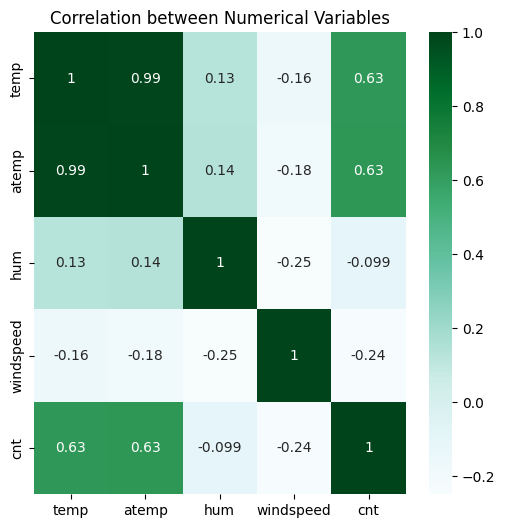

In [18]:
# Checking continuous variables relationship with each other
plt.figure(figsize = (6,6))
sns.heatmap(data[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.title("Correlation between Numerical Variables")
plt.show()

temp and atemp has correlation more than .99 means almost 1  and atemp seems to be derived from temp so one of them should be dropped,  will decide using VIF which one to drop.

#### Analyzing the categorical variables

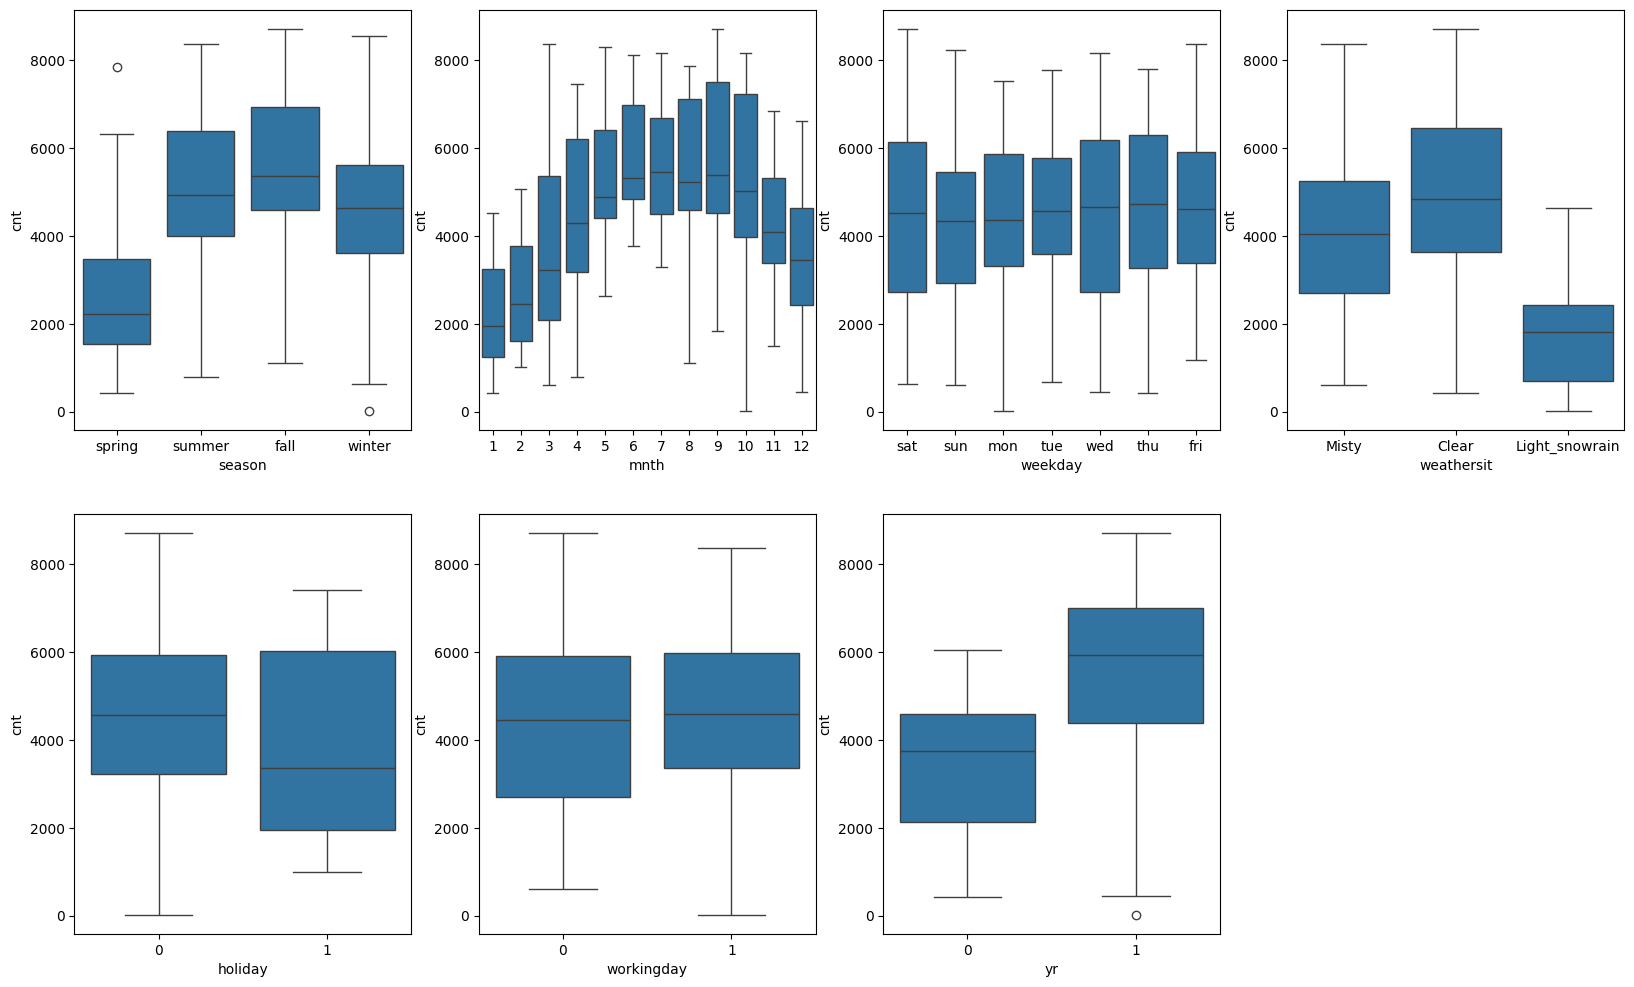

In [19]:
plt.figure(figsize=(20, 12))

# Subplot 1: Season vs. Bike Rentals
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=data)

# Subplot 2: Month vs. Bike Rentals
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=data)

# Subplot 3: Weekday vs. Bike Rentals
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=data)

# Subplot 4: Weather Situation vs. Bike Rentals
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=data)

# Subplot 5: Holiday vs. Bike Rentals
plt.subplot(2, 4, 5)
sns.boxplot(x='holiday', y='cnt', data=data)

# Subplot 6: Working Day vs. Bike Rentals
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=data)

# Subplot 7: Year vs. Bike Rentals
plt.subplot(2, 4, 7)
sns.boxplot(x='yr', y='cnt', data=data)

# Display the subplots
plt.show()


Insights:    
1. fall has highest demand for rental bikes
2. Demand is growing each month till June. September month has highest demand. After September, demand is decreasing.
3. Weekday is not giving clear picture abount demand but at saturdays demand is slightly high.
4. The clear weathershit has highest demand
5. When there is a holiday, demand has decreased.
6. Demand for year 2019 year has grown

# Data Prepration

In [20]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(data.month,drop_first=True)
weekdays_df=pd.get_dummies(data.weekday,drop_first=True)
weathersit_df=pd.get_dummies(data.weathersit,drop_first=True)
seasons_df=pd.get_dummies(data.season,drop_first=True)

In [21]:
# Convert boolean values to integers (0s and 1s)

months_df = months_df.astype(int)
weekdays_df = weekdays_df.astype(int)
weathersit_df = weathersit_df.astype(int)
seasons_df = seasons_df.astype(int)

In [22]:
# Merging  the dataframe, with the dummy variable dataset.
df_new = pd.concat([data,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [23]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [24]:
df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [25]:
# check the shape of new dataframe
df_new.shape

(730, 30)

# Splitting the data

In [26]:
# splitting the dataset in training and testing dataset
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [27]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [28]:
# Using MinMaxScaler to Rescale the features
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [29]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [30]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


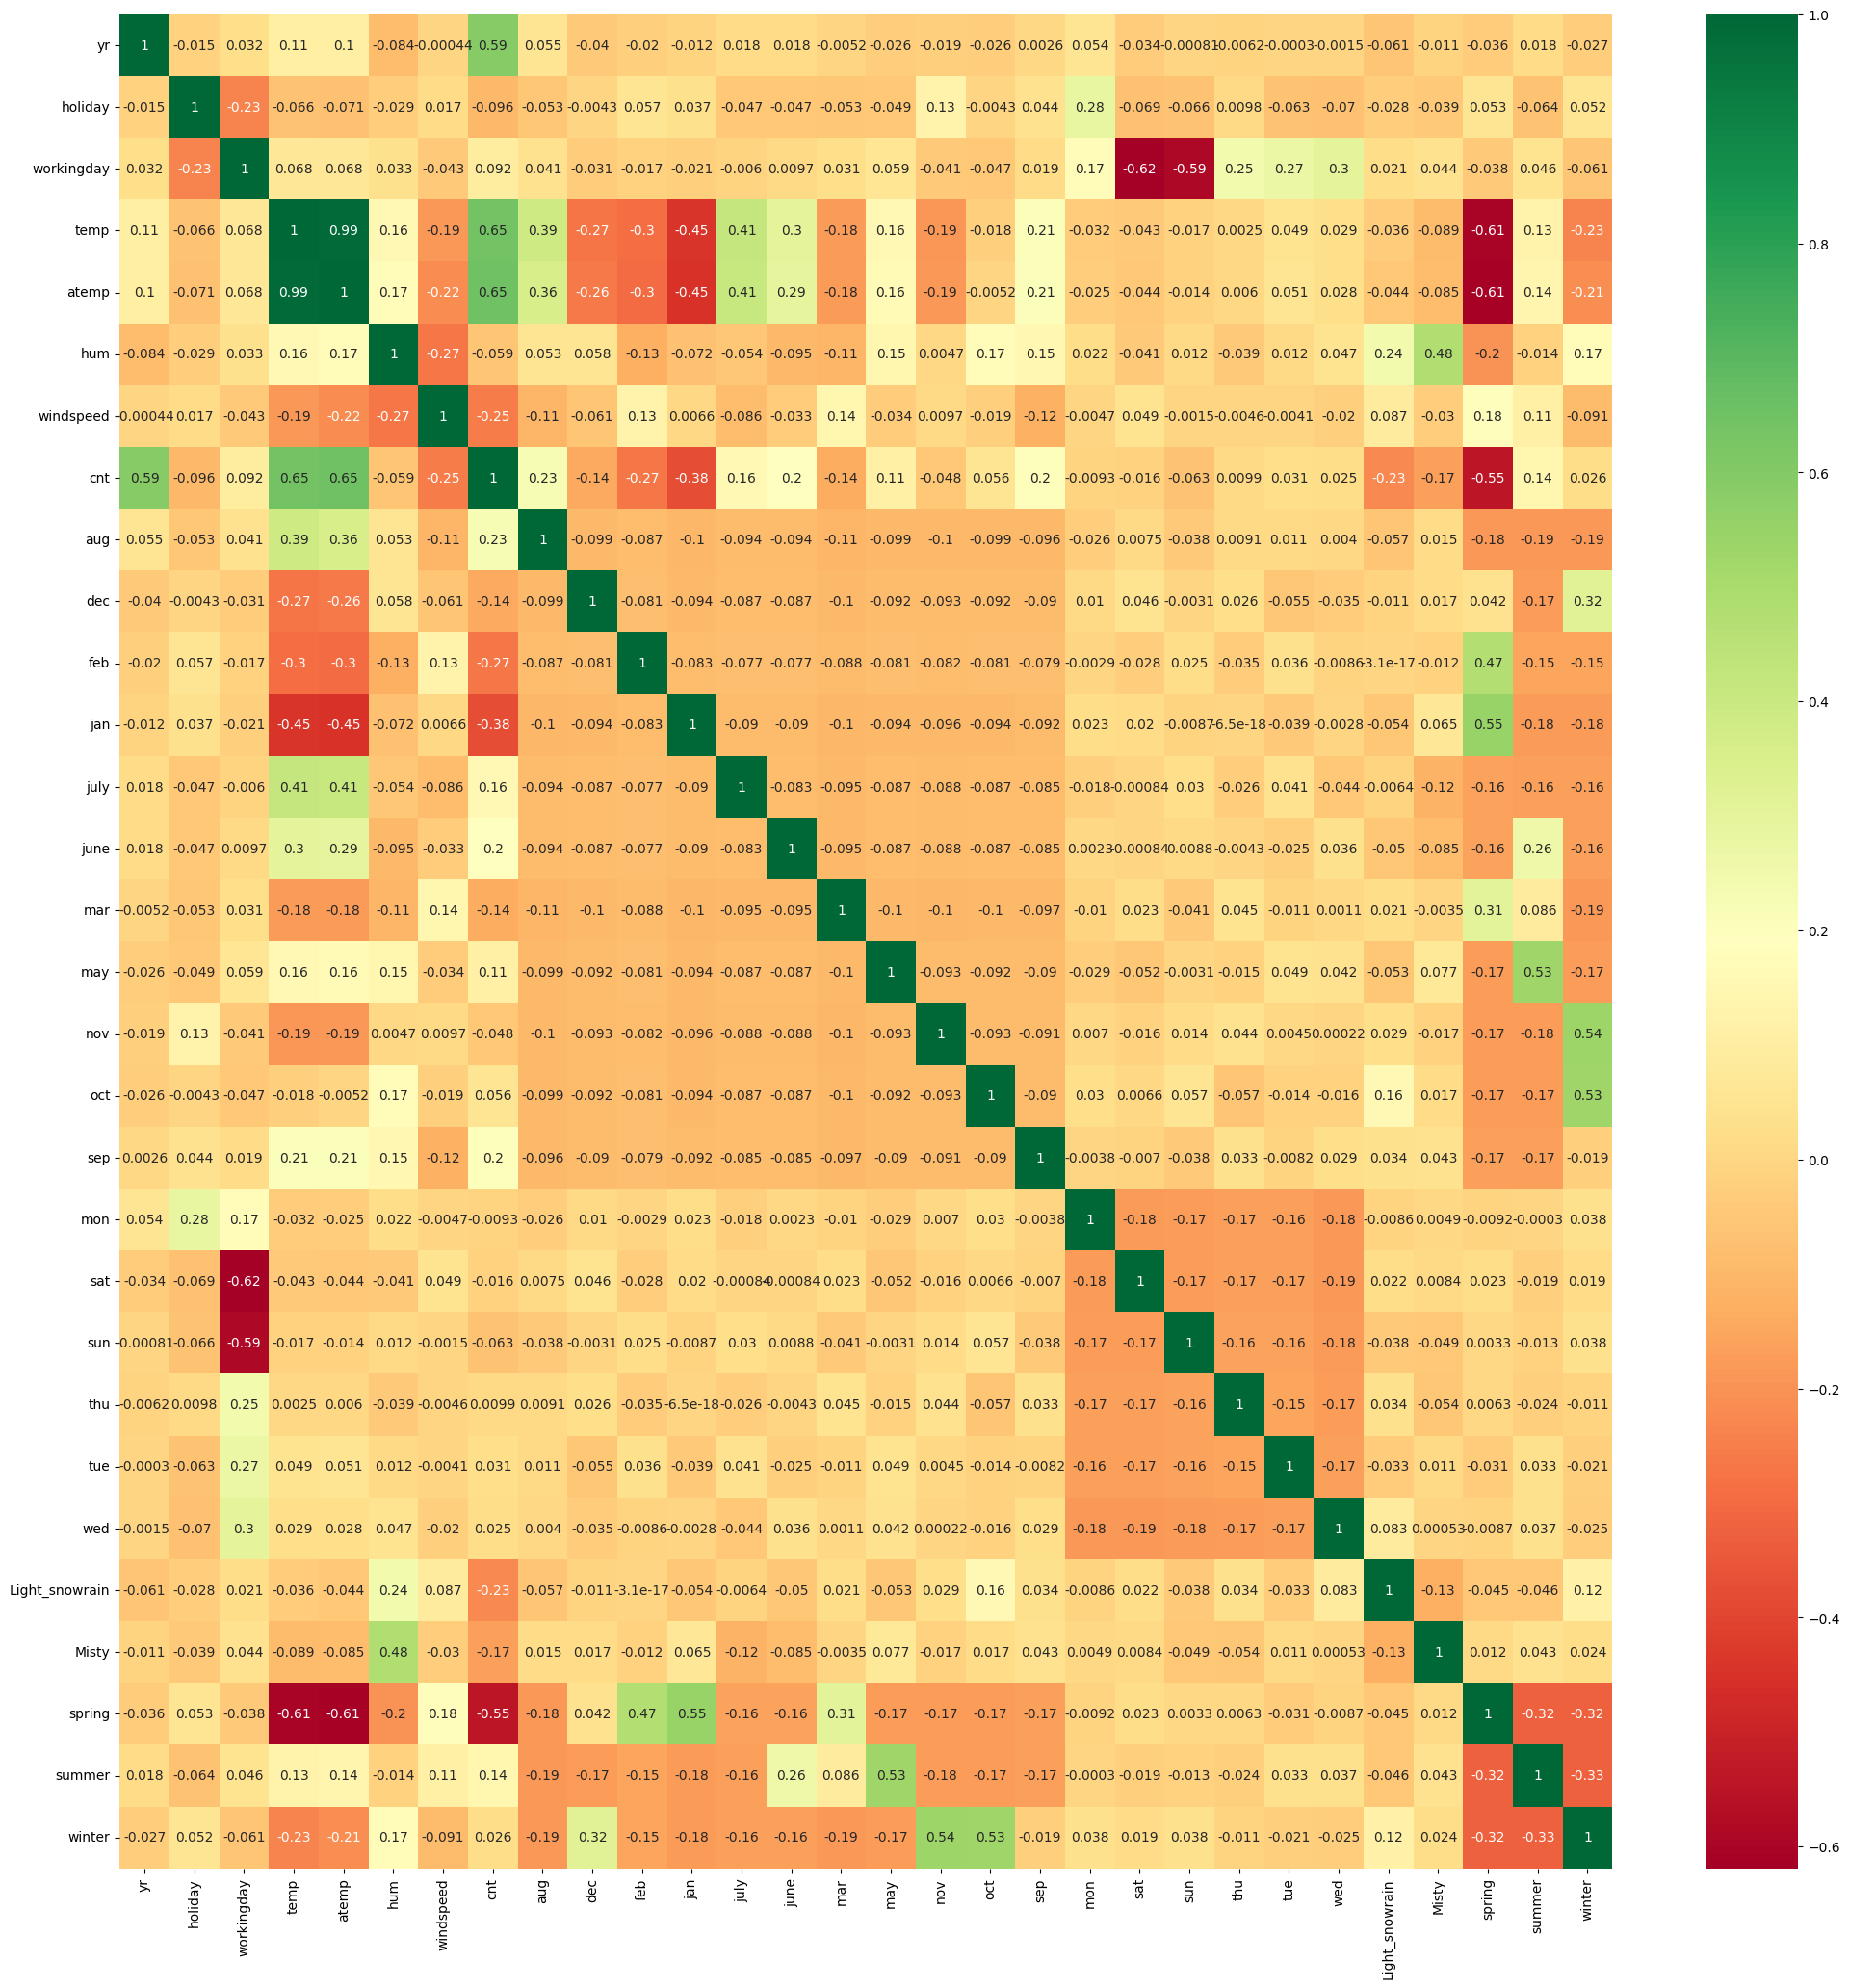

In [31]:
plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

cnt have good correlation with year variable and temp. Similarly, Misty and humidity also show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

In [32]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building the linear model

#### Using RFE to eliminate some columns

In [33]:
# Build a Lienar Regression model using SKLearn for RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [34]:
# Recursive feature elimination
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [35]:
#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [36]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [37]:
# rejected columns
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [38]:
#function for variance inflation factor
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [39]:
# dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [40]:
# calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Misty,2.29
0,yr,2.09
9,sat,1.98


In [41]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          4.22e-191
Time:                        14:28:37   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

In [42]:
# As workingday shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,hum,29.02
2,temp,16.75
4,windspeed,4.68
11,spring,4.35
13,winter,3.38
12,summer,2.79
10,Misty,2.29
0,yr,2.09
5,jan,1.67
6,july,1.59


In [43]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.1
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          3.10e-189
Time:                        14:28:37   Log-Likelihood:                 512.44
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     495   BIC:                            -931.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2920      0.035      8.

In [44]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'jan', 'july', 'sep',
       'sat', 'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [45]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['hum'], axis = 1)

In [46]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'jan', 'july', 'sep', 'sat',
       'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [47]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.16
3,windspeed,4.64
10,spring,2.76
11,summer,2.24
0,yr,2.07
12,winter,1.80
4,jan,1.61
5,july,1.59
9,Misty,1.56
6,sep,1.34


VIF values seems to be good now.

In [48]:
# Building 3nd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.48e-186
Time:                        14:28:37   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2120      0.030      6.

In [49]:
# We can drop sat variable as it has high p-value
X_train_new = X_train_new.drop(['sat'], axis = 1)

# calculating VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,spring,2.75
10,summer,2.24
0,yr,2.07
11,winter,1.78
4,jan,1.61
5,july,1.59
8,Misty,1.56
6,sep,1.34


VIF doesnt seems to be affected much

In [50]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          8.14e-187
Time:                        14:28:37   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.

In [51]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# calculating VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,yr,2.07
10,winter,1.78
4,july,1.58
7,Misty,1.55
5,sep,1.34
6,Light_snowrain,1.08


In [52]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          5.06e-187
Time:                        14:28:37   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.

We can cosider the above model as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

Overall model is Significant

In [53]:
lr_5.params

const             0.199434
yr                0.233570
holiday          -0.097463
temp              0.490988
windspeed        -0.147919
july             -0.052057
sep               0.076846
Light_snowrain   -0.284199
Misty            -0.080167
spring           -0.067169
summer            0.046487
winter            0.081741
dtype: float64

#### Residual Analysis of the train data and validation

In [54]:
y_train_pred = lr_5.predict(X_train_lm_5)

Text(0.5, 0, 'Errors')

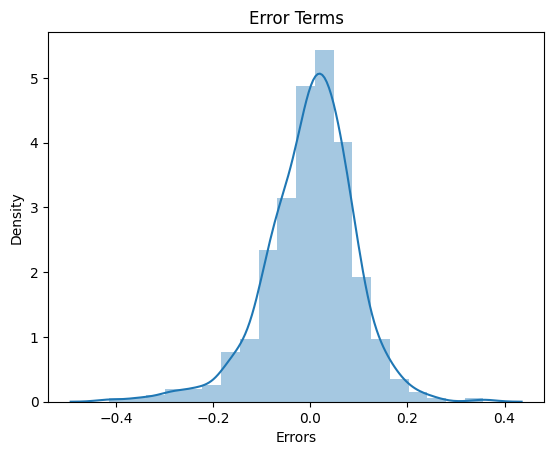

In [55]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms')
plt.xlabel('Errors')

Errors are following the normal distribution

In [56]:
#Checking Multi Colinearity
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,yr,2.07
10,winter,1.78
4,july,1.58
7,Misty,1.55
5,sep,1.34
6,Light_snowrain,1.08


VIF values are less than 5 which is good therefore there is no multicolinearity.

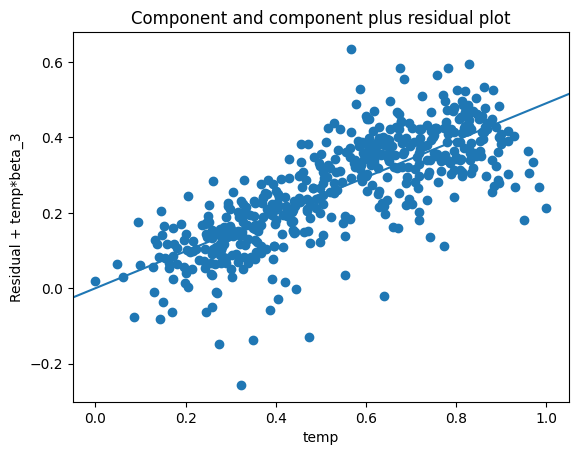

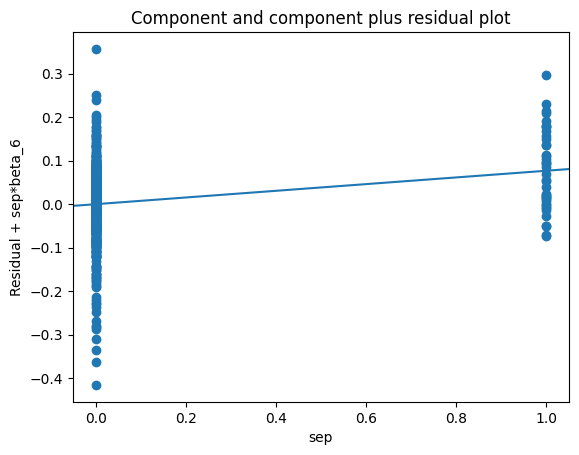

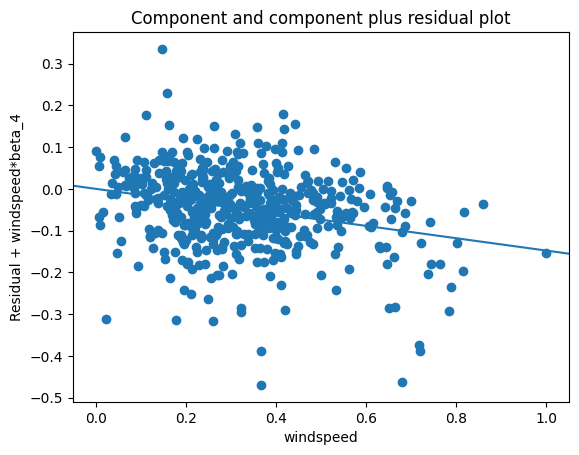

In [57]:
#Checking Linearity
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_5, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()

From these graphs we can see that there is some linearity

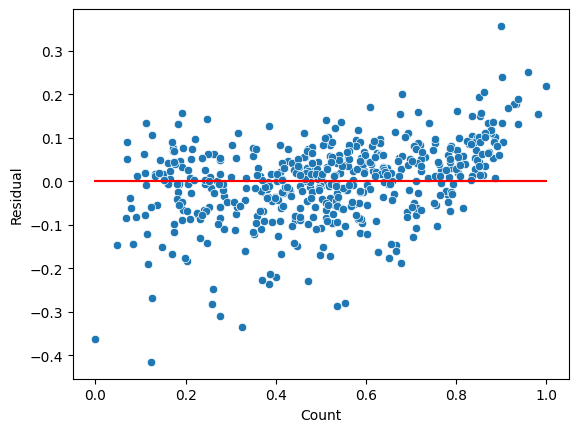

In [58]:
#Homoscedasticity
y_train_pred = lr_5.predict(X_train_lm_5)
residual = y_train - y_train_pred
sns.scatterplot(x = y_train, y = residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No pattern observed from above plot for residuals.

# Making Predictions Using the Final Model

In [59]:
df_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,19.509153,23.45270,73.3750,11.666643,6606,0,1,...,0,0,0,1,0,0,0,0,0,1
127,0,0,0,21.661653,25.94665,63.1667,5.000712,4333,0,0,...,0,1,0,0,0,0,0,0,1,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,...,0,0,0,0,1,0,1,0,0,1
72,0,0,1,13.333897,16.60000,49.6957,9.174042,2046,0,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
# Applying scaling on the test dataset
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [61]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
y_test = df_test.pop('cnt')

In [63]:
X_test = df_test

In [64]:
X_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0,1,0,...,0,0,0,1,0,0,0,0,0,1
127,0,0,0,0.584649,0.577380,0.650923,0.069510,0,0,0,...,0,1,0,0,0,0,0,0,1,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0,0,0,...,0,0,0,0,1,0,1,0,0,1
72,0,0,1,0.331557,0.332005,0.512107,0.203418,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [65]:
col1 = X_train_new.columns

In [66]:
col1

Index(['yr', 'holiday', 'temp', 'windspeed', 'july', 'sep', 'Light_snowrain',
       'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [67]:
X_test = X_test[col1]

In [68]:
# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [69]:
X_test

,yr,holiday,temp,windspeed,july,sep,Light_snowrain,Misty,spring,summer,winter
184,0,1,0.831783,0.084219,1,0,0,1,0,0,0
535,1,0,0.901354,0.153728,0,0,0,0,0,1,0
299,0,0,0.511964,0.334206,0,0,0,1,0,0,1
221,0,0,0.881625,0.339570,0,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,0.519232,0.283397,0,0,0,0,0,0,1
127,0,0,0.584649,0.069510,0,0,0,0,0,1,0
640,1,0,0.745598,0.052115,0,0,0,1,0,0,1
72,0,0,0.331557,0.203418,0,0,0,0,1,0,0


In [70]:
y_pred = lr_5.predict(X_test_lm_5)

In [71]:
# Calculating R^2 value for the test dataset
r2 = r2_score(y_test, y_pred)

print(f'R2 Score: {r2}')

R2 Score: 0.8052680349048551


# Model Evaluation

Text(0, 0.5, 'y_pred')

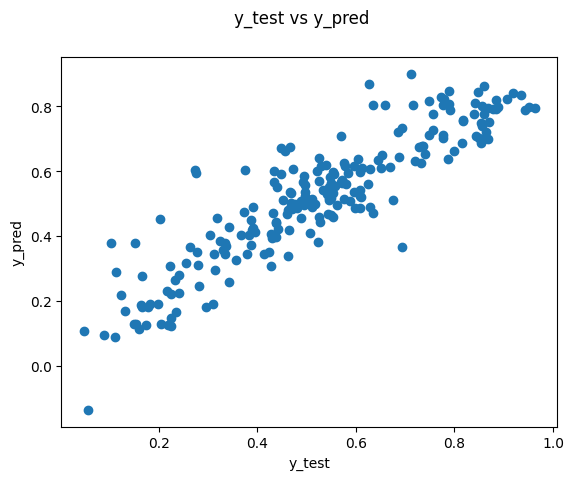

In [72]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [73]:
round(lr_5.params,4)

const             0.1994
yr                0.2336
holiday          -0.0975
temp              0.4910
windspeed        -0.1479
july             -0.0521
sep               0.0768
Light_snowrain   -0.2842
Misty            -0.0802
spring           -0.0672
summer            0.0465
winter            0.0817
dtype: float64

In [74]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.795


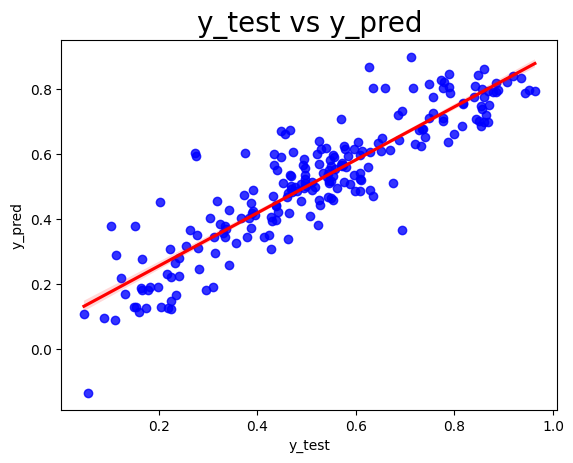

In [75]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

# Comparision between Training and Testing dataset:

1. Train dataset R^2          :  0.839
2. Test dataset R^2           :  0.807
3. Train dataset Adjusted R^2 :  0.835    
4. Test dataset Adjusted R^2  :  0.0.796

#### Demand of bikes depend on year, holiday, temp, windspeed, sep, sun, Light_snowrain, Misty, spring, summer and winter.